## 相参积累检测器ROC曲线
考虑如下检测问题
\begin{aligned}
    H_0 &: \boldsymbol{x} = \boldsymbol{w}\\
    H_1 &: \boldsymbol{x} = \boldsymbol{s} + \boldsymbol{w}\\
\end{aligned}
其中$\boldsymbol{s} = s_0\mathbf{1}_N\in\mathbb{R}^{N}$为固定幅度目标，$\boldsymbol{w}$的分量$w_i$独立同分布于$\mathcal{N}(0,\sigma_n^2)$. 使用相参积累检测器对该问题进行检测则有如下关系
\begin{equation*}
    P_{d} = Q\left( Q^{-1}\left(P_{fa} \right) - \sqrt{N}\sqrt{SNR} \right)
\end{equation*}
其中$SNR = \frac{s_0^2}{\sigma_n^2}$.

In [1]:
from scipy import special as sp
import numpy as np

def qfuncinv(y):
    return np.sqrt(2) * sp.erfinv(1 - 2 * y)

def qfunc(x):
    return 0.5 - 0.5 * sp.erf(x / np.sqrt(2))

def coherentPd(pfa, snrdb, numPulses):
    snr = np.power(10, snrdb/10)
    return qfunc(qfuncinv(pfa) - np.sqrt(numPulses * snr))

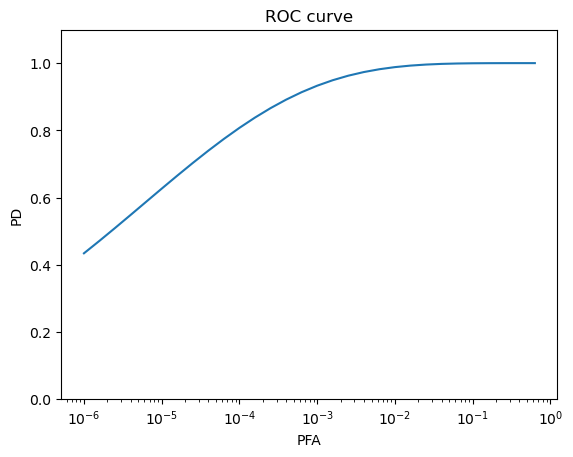

In [2]:
## 相参积累检测器的检测性能
K = 8 #积累脉冲个数
pfa = np.power(10,np.arange(-6.,0.,0.2)) #虚警率
snrdb = 4.2 #输入信噪比
pd = []
for i in range(0,len(pfa)):
    pd_result = coherentPd(pfa[i], snrdb, K)
    pd.append(pd_result)

# 画图
import matplotlib.pyplot as plt
plt.semilogx(pfa, pd, '-')  # '*'表示标记点，'-'表示连接线

# 添加标题和标签
plt.title('ROC curve')
plt.xlabel('PFA')
plt.ylabel('PD')
plt.ylim(0,1.1)

# 显示图例
# plt.legend(['Coherent Detector'])

# 显示图表
plt.show()